In [1]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import numpy as np
import cmocean
import geopandas as gp
import cartopy.io.shapereader as shpreader

from unseen import fileio
from unseen import spatial_selection
from unseen import time_utils

## Map info

In [2]:
# CAFE grid

lat_bounds = np.array([-90.      , -88.988764, -86.966292, -84.94382 , -82.921348, -80.898876,
       -78.876404, -76.853933, -74.831461, -72.808989, -70.786517, -68.764045,
       -66.741573, -64.719101, -62.696629, -60.674157, -58.651685, -56.629213,
       -54.606742, -52.58427 , -50.561798, -48.539326, -46.516854, -44.494382,
       -42.47191 , -40.449438, -38.426966, -36.404494, -34.382022, -32.359551,
       -30.337079, -28.314607, -26.292135, -24.269663, -22.247191, -20.224719,
       -18.202247, -16.179775, -14.157303, -12.134831, -10.11236 ,  -8.089888,
        -6.067416,  -4.044944,  -2.022472,   0.      ,   2.022472,   4.044944,
         6.067416,   8.089888,  10.11236 ,  12.134831,  14.157303,  16.179775,
        18.202247,  20.224719,  22.247191,  24.269663,  26.292135,  28.314607,
        30.337079,  32.359551,  34.382022,  36.404494,  38.426966,  40.449438,
        42.47191 ,  44.494382,  46.516854,  48.539326,  50.561798,  52.58427 ,
        54.606742,  56.629213,  58.651685,  60.674157,  62.696629,  64.719101,
        66.741573,  68.764045,  70.786517,  72.808989,  74.831461,  76.853933,
        78.876404,  80.898876,  82.921348,  84.94382 ,  86.966292,  88.988764,
        90.      ])

lon_bounds = np.array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5, 360. ])

In [3]:
#ec_cafe = Polygon([
#    (115, -28.314607),
#    (115, -32.359551),
#]
#)
#
#ec_cafe_region = gp.GeoDataFrame({'DNAME': ['east-coast-floods-region'],
#                                  'geometry': gp.GeoSeries([sw])})
#custom_wheat_sheep

In [47]:
def plot_cities(ax, label_color='white'):
    lats = [-27.4705, -28.8094, -33.8688,]
    lons = [153.0260, 153.2879, 151.2093]
    cities = ['Brisbane', 'Lismore', 'Sydney']
    offsets = {'Brisbane': -2.0, 'Lismore': -1.9, 'Sydney': 0.3}
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(lon + offsets[city], lat, city, fontsize='large', color=label_color,
                transform=ccrs.PlateCarree())

In [3]:
#drainage_divisions_file = '/g/data/xv83/dbi599/east-coast-rain/shapefiles/ADD_2021_AUST_GDA2020_SHP.zip'
#drainage_divisions = gp.read_file(drainage_divisions_file)

In [5]:
river_regions_file = '/g/data/xv83/dbi599/east-coast-rain/shapefiles/australias-river-basins-1997.shp'
river_regions = gp.read_file(river_regions_file)

In [6]:
sec_river_regions = river_regions[(river_regions['DNUM'] == 'II') & (river_regions['BNUM'].astype(int) < 21)]
sec_river_regions

,AUS,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry
134,1075.0,1107.0,dbasin_cent,WOLLONGONG COAST,14,SYDNEY,C,SOUTH-EAST COAST,II,-34.417415,150.873384,"POLYGON ((150.94650 -34.26570, 150.94840 -34.2..."
140,978.0,1002.0,dbasin_cent,RICHMOND RIVER,3,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-28.829297,153.088354,"POLYGON ((153.10684 -28.35850, 153.10760 -28.3..."
142,1001.0,1034.0,dbasin_cent,HASTINGS RIVER,7,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-31.405976,152.532930,"POLYGON ((152.73519 -31.81266, 152.73050 -31.8..."
143,1002.0,1035.0,dbasin_cent,MANNING RIVER,8,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-31.742574,151.898200,"POLYGON ((151.15560 -31.63000, 151.16080 -31.6..."
149,1047.0,1079.0,dbasin_cent,SYDNEY COAST-GEORGES RIVER,13,SYDNEY,C,SOUTH-EAST COAST,II,-33.945151,151.017672,"POLYGON ((151.31184 -33.68214, 151.31056 -33.6..."
159,1130.0,1162.0,dbasin_cent,MORUYA RIVER,17,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-35.847003,149.860758,"POLYGON ((149.67140 -35.99000, 149.67530 -35.9..."
192,1145.0,1177.0,dbasin_cent,TOWAMBA RIVER,20,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-37.087069,149.728496,"POLYGON ((149.97527 -37.50684, 149.97460 -37.5..."
207,997.0,1029.0,dbasin_cent,MACLEAY RIVER,6,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-30.811435,152.094018,"POLYGON ((151.39620 -30.83830, 151.40290 -30.8..."
247,1033.0,1065.0,dbasin_cent,MACQUARIE-TUGGERAH LAKES,11,HUNTER,B,SOUTH-EAST COAST,II,-33.151200,151.452538,"POLYGON ((151.47567 -33.40887, 151.47220 -33.4..."
252,975.0,999.0,dbasin_cent,CLARENCE RIVER,4,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-29.517220,152.496640,"POLYGON ((151.66960 -30.02420, 151.66890 -30.0..."


<AxesSubplot:>

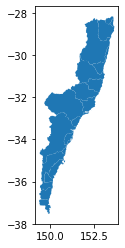

In [7]:
sec_river_regions.plot()

In [8]:
np.sort((sec_river_regions['BNUM'].unique().astype(int)))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [9]:
nec_river_regions = river_regions[(river_regions['DNUM'] == 'I') & (river_regions['BNUM'].astype(int) > 36)]
nec_river_regions

,AUS,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry
60,876.0,885.0,island_cent,NOOSA RIVER,40,MARY,I,NORTH-EAST COAST,I,-25.552874,152.908294,"POLYGON ((152.90884 -25.55663, 152.90611 -25.5..."
82,855.0,875.0,dbasin_cent,BURRUM RIVER,37,BURNETT,H,NORTH-EAST COAST,I,-25.247105,152.387593,"POLYGON ((152.39909 -24.76158, 152.39987 -24.7..."
111,909.0,931.0,dbasin_cent,MAROOCHY RIVER,41,MARY,I,NORTH-EAST COAST,I,-26.754048,152.995269,"POLYGON ((153.07767 -27.10470, 153.07709 -27.1..."
122,910.0,932.0,dbasin_cent,BRISBANE RIVER,43,BRISBANE,J,NORTH-EAST COAST,I,-27.308991,152.399606,"POLYGON ((152.19580 -27.92850, 152.19290 -27.9..."
125,853.0,872.0,dbasin_cent,FRASER ISLAND,39,MARY,I,NORTH-EAST COAST,I,-25.261417,153.141697,"POLYGON ((152.98278 -25.67499, 152.98015 -25.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,968.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.862005,153.400748,"POLYGON ((153.40242 -27.86473, 153.40199 -27.8..."
1115,969.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.875513,153.403628,"POLYGON ((153.40258 -27.86972, 153.40479 -27.8..."
1116,970.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.877579,153.416939,"POLYGON ((153.41664 -27.88375, 153.41621 -27.8..."
1117,971.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.888612,153.401180,"POLYGON ((153.40198 -27.89110, 153.40118 -27.8..."


<AxesSubplot:>

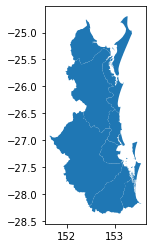

In [10]:
nec_river_regions.plot()

In [11]:
np.sort((nec_river_regions['BNUM'].unique().astype(int)))

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [12]:
reader = shpreader.Reader(river_regions_file)

In [13]:
regions = reader.records()

In [14]:
region_list = []
for region in regions:
    if (region.attributes['DNUM'] == 'II') & (int(region.attributes['BNUM']) < 21):
        region_list.append(region)
    elif (region.attributes['DNUM'] == 'I') & (int(region.attributes['BNUM']) > 36):
        region_list.append(region)

In [15]:
len(region_list)

135

In [16]:
len(sec_river_regions)

34

In [17]:
len(nec_river_regions)

101

## Day-by-day rainfall

In [18]:
agcd_files = glob.glob('/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_*_daily.nc')
agcd_files.sort()

In [19]:
ds = xr.open_dataset(agcd_files[-1])

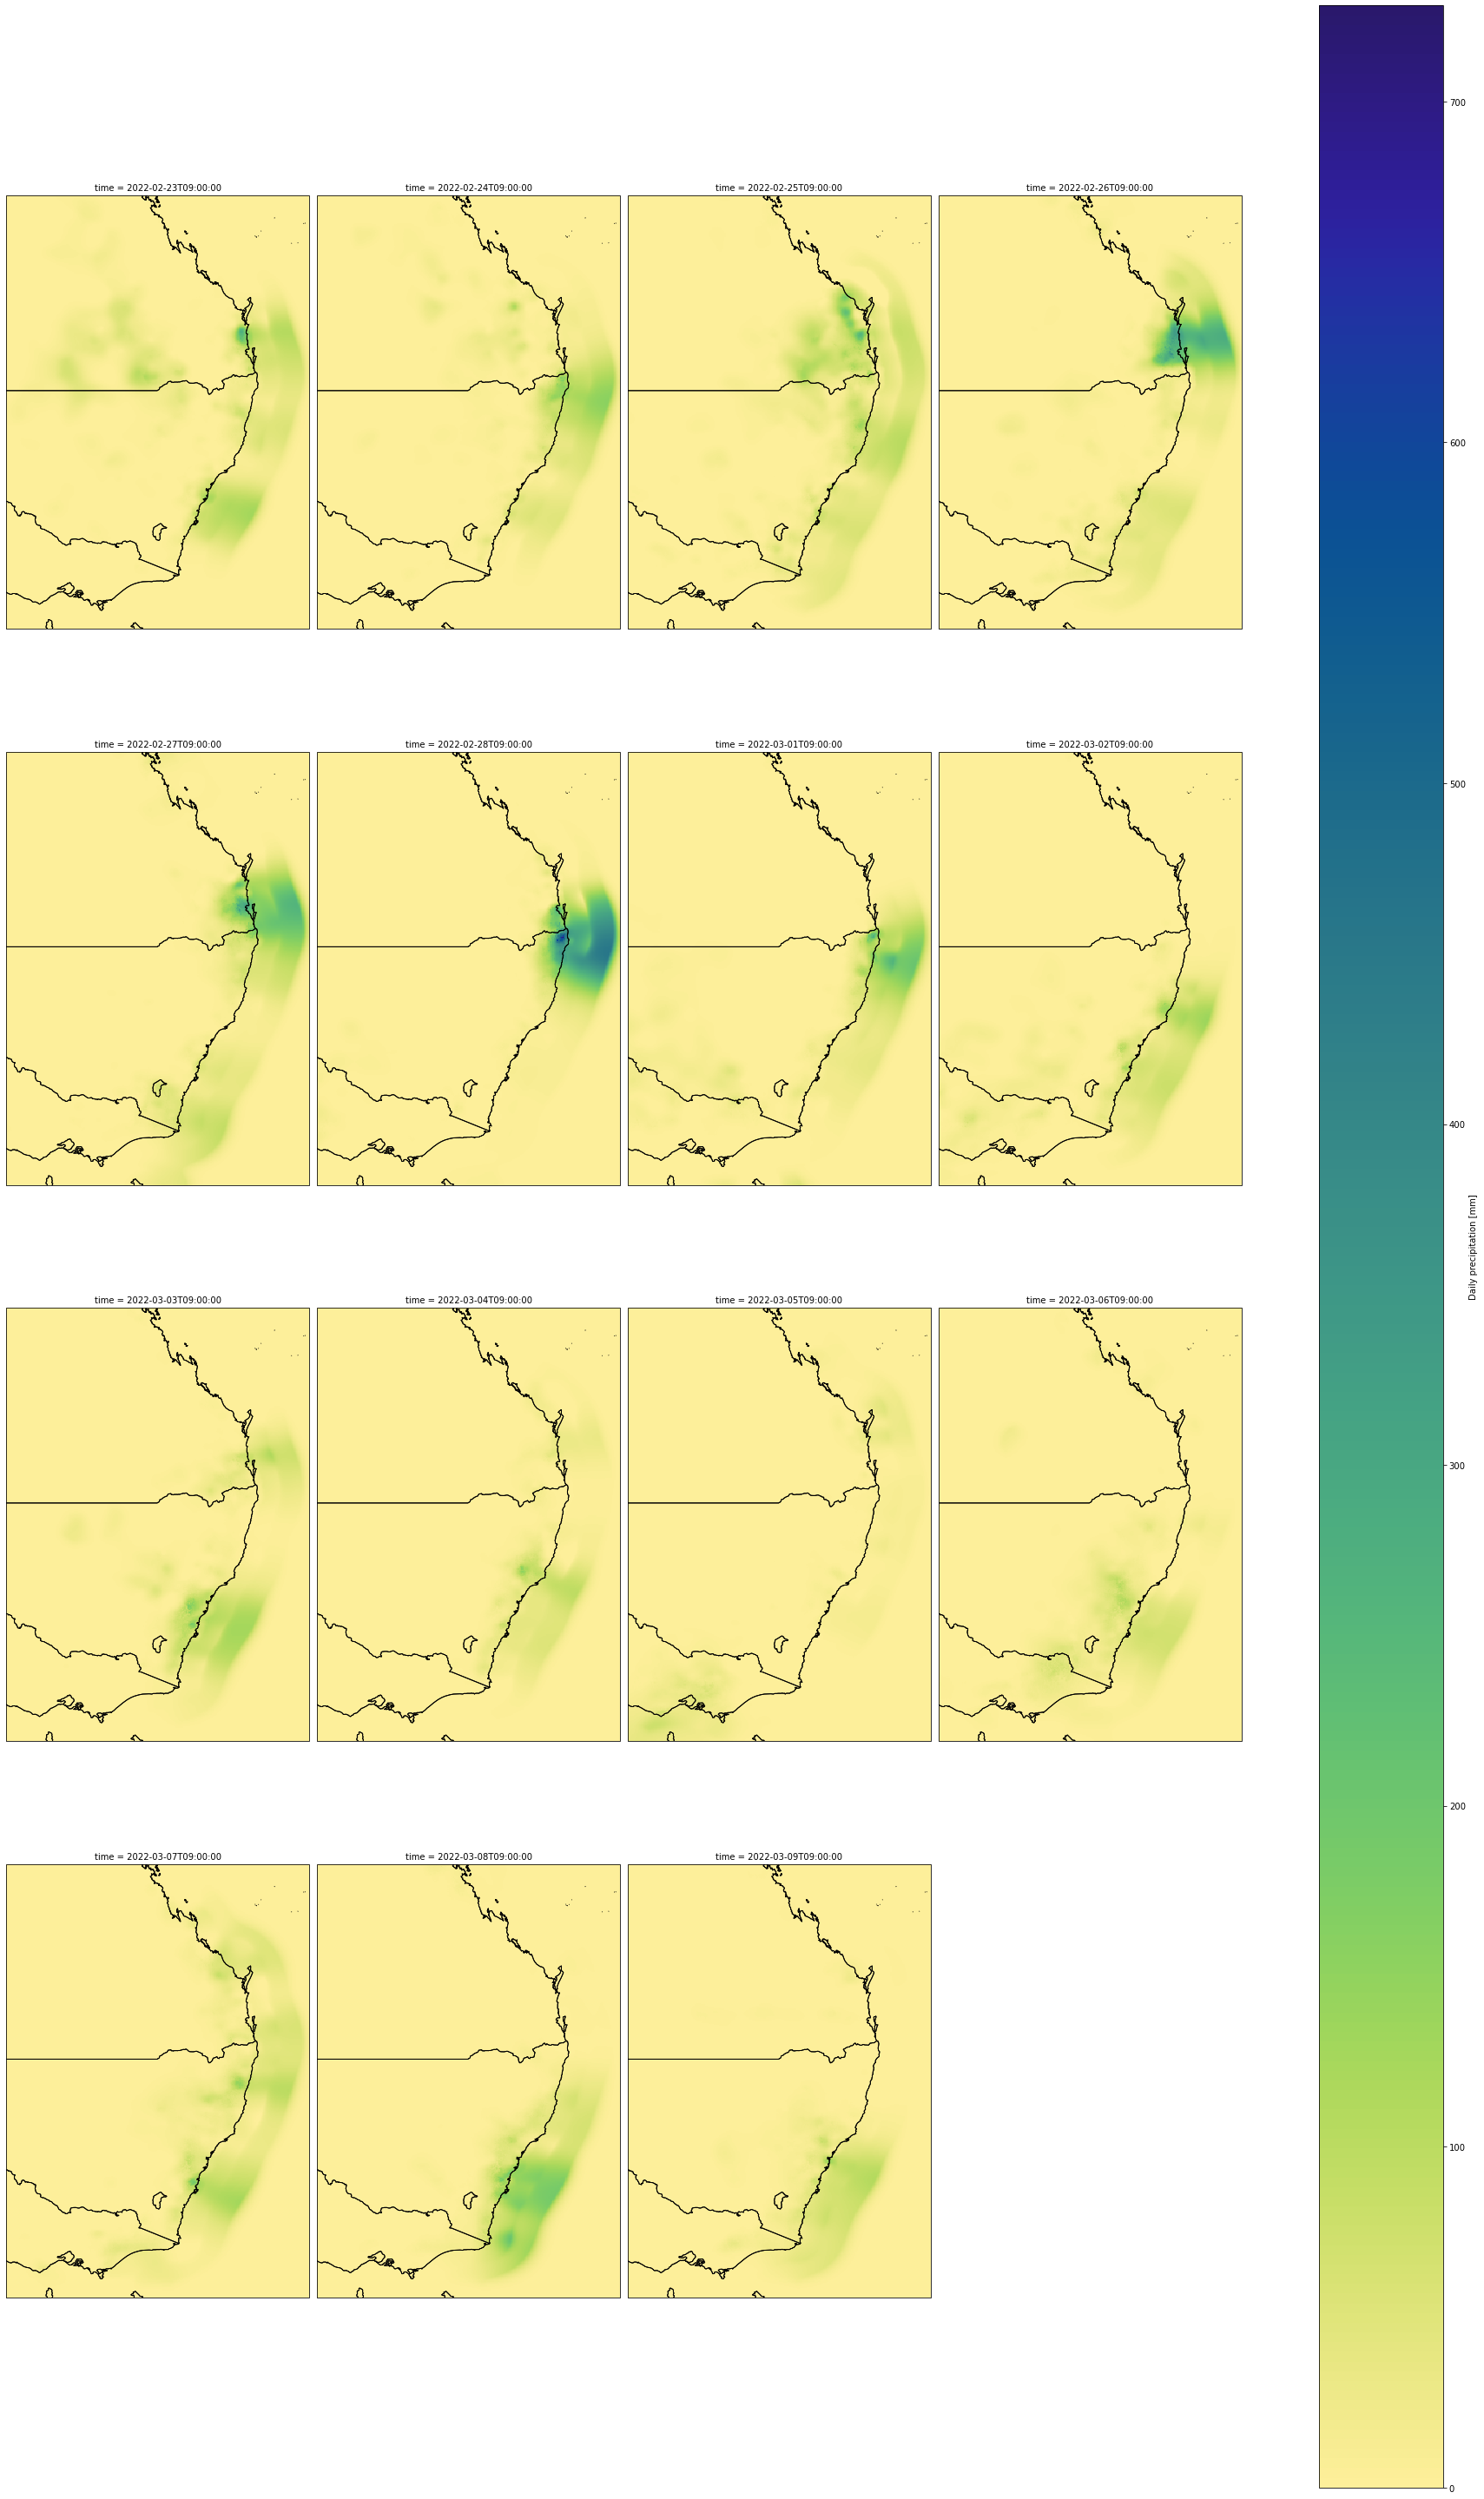

In [20]:
p = ds['precip'].sel(time=slice('2022-02-23', '2022-03-09')).plot(
    col='time',
    col_wrap=4,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())

## Total rainfall

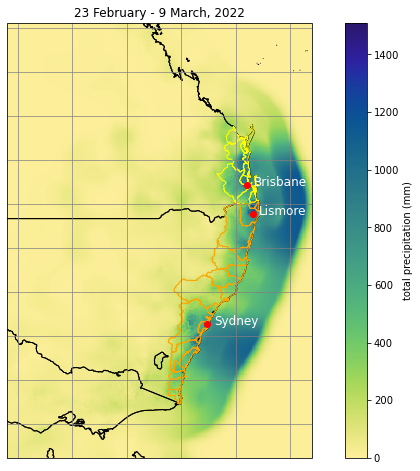

In [28]:
precip_total = ds['precip'].sel(time=slice('2022-02-23', '2022-03-09')).sum(dim=['time'])

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
precip_total.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    cbar_kwargs={'label': 'total precipitation (mm)'}
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_geometries(sec_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='orange')
ax.add_geometries(nec_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='yellow')
ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
for lat in lat_bounds:
    if (lat > ymin) and (lat < ymax):
        ax.axhline(lat, color='0.5', linewidth=0.7)
for lon in lon_bounds:
    if (lon > xmin) and (lon < xmax):
        ax.axvline(lon, color='0.5', linewidth=0.7)
plot_cities(ax)
ax.set_title('23 February - 9 March, 2022')
plt.show()

In [29]:
ds_masked = fileio.open_dataset(agcd_files[-1], shapefile='/g/data/xv83/dbi599/nov-rain/shapefiles/australia.shp')

In [30]:
ds_masked = ds_masked.compute()
precip_total_masked = ds_masked['precip'].sel(time=slice('2022-02-23', '2022-03-09')).sum(dim=['time'], min_count=1)
precip_total_masked_box = spatial_selection.select_box_region(precip_total_masked, [-40, -20, 149, 154])

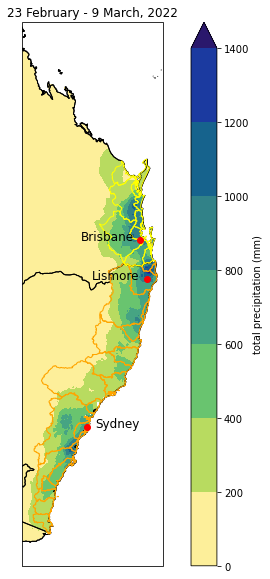

In [49]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
precip_total_masked_box.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    levels=np.arange(0, 1600, 200),
    cbar_kwargs={'label': 'total precipitation (mm)'}
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_geometries(sec_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='orange')
ax.add_geometries(nec_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='yellow')
#ax.set_extent([149, 156, -20, -40], crs=ccrs.PlateCarree())
#ymin, ymax = ax.get_ylim()
#xmin, xmax = ax.get_xlim()
#for lat in lat_bounds:
#    if (lat > ymin) and (lat < ymax):
#        ax.axhline(lat, color='0.5', linewidth=0.7)
#for lon in lon_bounds:
#    if (lon > xmin) and (lon < xmax):
#        ax.axvline(lon, color='0.5', linewidth=0.7)
plot_cities(ax, label_color='black')
ax.set_title('23 February - 9 March, 2022')
plt.savefig(
    f'/g/data/xv83/dbi599/east-coast-rain/figures/east-coast-rainfall_15day-totals_AGCD_river-regions.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300
)
plt.show()

## New shapefiles

### South East Coast (NSW) Drainage Division

In [50]:
sec_division = sec_river_regions.dissolve()
sec_division = sec_division.drop(columns=['AUS', 'AUS_ID', 'F_CODE', 'BNAME', 'BNUM', 'RNAME', 'RNUM', 'CENTROID_Y', 'CENTROID_X'])
sec_division

,geometry,DNAME,DNUM
0,"MULTIPOLYGON (((149.96225 -37.51476, 149.96138...",SOUTH-EAST COAST,II


In [51]:
sec_division.to_file('/g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.shp')

In [52]:
!ls /g/data/xv83/dbi599/east-coast-rain/shapefiles/

42343_shp.zip			  australias-river-basins-1997.txt
ADD_2021_AUST_GDA2020_SHP.zip	  kx-australias-river-basins-1997-SHP.zip
australias-river-basins-1997.cpg  south-east-coast-nsw.cpg
australias-river-basins-1997.dbf  south-east-coast-nsw.dbf
australias-river-basins-1997.prj  south-east-coast-nsw.prj
australias-river-basins-1997.shp  south-east-coast-nsw.shp
australias-river-basins-1997.shx  south-east-coast-nsw.shx


In [53]:
!zip /g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw_shp.zip /g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.*

  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.cpg (stored 0%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.dbf (deflated 77%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.prj (deflated 20%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.shp (deflated 50%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.shx (deflated 45%)


In [55]:
!rm /g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.*

### Entire flood region division

In [75]:
flood_river_regions = sec_river_regions.append(nec_river_regions)
flood_river_regions

,AUS,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry
134,1075.0,1107.0,dbasin_cent,WOLLONGONG COAST,14,SYDNEY,C,SOUTH-EAST COAST,II,-34.417415,150.873384,"POLYGON ((150.94650 -34.26570, 150.94840 -34.2..."
140,978.0,1002.0,dbasin_cent,RICHMOND RIVER,3,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-28.829297,153.088354,"POLYGON ((153.10684 -28.35850, 153.10760 -28.3..."
142,1001.0,1034.0,dbasin_cent,HASTINGS RIVER,7,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-31.405976,152.532930,"POLYGON ((152.73519 -31.81266, 152.73050 -31.8..."
143,1002.0,1035.0,dbasin_cent,MANNING RIVER,8,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-31.742574,151.898200,"POLYGON ((151.15560 -31.63000, 151.16080 -31.6..."
149,1047.0,1079.0,dbasin_cent,SYDNEY COAST-GEORGES RIVER,13,SYDNEY,C,SOUTH-EAST COAST,II,-33.945151,151.017672,"POLYGON ((151.31184 -33.68214, 151.31056 -33.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,968.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.862005,153.400748,"POLYGON ((153.40242 -27.86473, 153.40199 -27.8..."
1115,969.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.875513,153.403628,"POLYGON ((153.40258 -27.86972, 153.40479 -27.8..."
1116,970.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.877579,153.416939,"POLYGON ((153.41664 -27.88375, 153.41621 -27.8..."
1117,971.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.888612,153.401180,"POLYGON ((153.40198 -27.89110, 153.40118 -27.8..."


In [76]:
flood_division = flood_river_regions.dissolve()
flood_division = flood_division.drop(columns=['AUS', 'AUS_ID', 'F_CODE', 'BNAME', 'BNUM', 'RNAME', 'RNUM', 'CENTROID_Y', 'CENTROID_X'])

In [62]:
flood_division['DNAME'][0] = 'EAST COAST FLOOD'
flood_division['DNUM'][0] = 'I + II'

<ipython-input-62-d524ab42cf6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_division['DNAME'][0] = 'EAST COAST FLOOD'


In [65]:
flood_division

,geometry,DNAME,DNUM
0,"MULTIPOLYGON (((149.96219 -37.51844, 149.96173...",EAST COAST FLOOD,I + II


In [66]:
flood_division.to_file('/g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shp')

In [67]:
!ls /g/data/xv83/dbi599/east-coast-rain/shapefiles/

42343_shp.zip			  east-coast-flood.cpg
ADD_2021_AUST_GDA2020_SHP.zip	  east-coast-flood.dbf
australias-river-basins-1997.cpg  east-coast-flood.prj
australias-river-basins-1997.dbf  east-coast-flood.shp
australias-river-basins-1997.prj  east-coast-flood.shx
australias-river-basins-1997.shp  kx-australias-river-basins-1997-SHP.zip
australias-river-basins-1997.shx  south-east-coast-nsw_shp.zip
australias-river-basins-1997.txt


In [68]:
!zip /g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood_shp.zip /g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.*

  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.cpg (stored 0%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.dbf (deflated 76%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.prj (deflated 20%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shp (deflated 50%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shx (deflated 45%)


In [69]:
!rm /g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.*

### Entire flood river regions

In [77]:
flood_river_regions_dissolved = flood_river_regions.dissolve(by='BNUM')

In [78]:
flood_river_regions_dissolved

,geometry,AUS,AUS_ID,F_CODE,BNAME,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X
BNUM,,,,,,,,,,,
1,"POLYGON ((153.10684 -28.35850, 153.10804 -28.3...",974.0,998.0,dbasin_cent,TWEED RIVER,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-28.354336,153.323548
10,"POLYGON ((151.86786 -32.84680, 151.86537 -32.8...",1003.0,1036.0,dbasin_cent,HUNTER RIVER,HUNTER,B,SOUTH-EAST COAST,II,-32.344333,150.860018
11,"POLYGON ((151.47567 -33.40887, 151.47220 -33.4...",1033.0,1065.0,dbasin_cent,MACQUARIE-TUGGERAH LAKES,HUNTER,B,SOUTH-EAST COAST,II,-33.151200,151.452538
12,"MULTIPOLYGON (((149.54160 -34.98430, 149.54440...",1039.0,1059.0,island_cent,HAWKESBURY RIVER,SYDNEY,C,SOUTH-EAST COAST,II,-33.515238,151.178325
13,"POLYGON ((151.31184 -33.68214, 151.31056 -33.6...",1047.0,1079.0,dbasin_cent,SYDNEY COAST-GEORGES RIVER,SYDNEY,C,SOUTH-EAST COAST,II,-33.945151,151.017672
14,"POLYGON ((150.94650 -34.26570, 150.94840 -34.2...",1075.0,1107.0,dbasin_cent,WOLLONGONG COAST,SYDNEY,C,SOUTH-EAST COAST,II,-34.417415,150.873384
15,"POLYGON ((149.52820 -35.41860, 149.53230 -35.4...",1094.0,1126.0,dbasin_cent,SHOALHAVEN RIVER,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-35.122407,150.051912
16,"MULTIPOLYGON (((150.13330 -35.88200, 150.12560...",1112.0,1144.0,dbasin_cent,CLYDE RIVER-JERVIS BAY,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-35.398168,150.280133
17,"POLYGON ((149.67140 -35.99000, 149.67530 -35.9...",1130.0,1162.0,dbasin_cent,MORUYA RIVER,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-35.847003,149.860758


In [79]:
flood_river_regions_dissolved.to_file('/g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.shp')

In [80]:
!ls /g/data/xv83/dbi599/east-coast-rain/shapefiles/

42343_shp.zip			  east-coast-flood-river-regions.cpg
ADD_2021_AUST_GDA2020_SHP.zip	  east-coast-flood-river-regions.dbf
australias-river-basins-1997.cpg  east-coast-flood-river-regions.prj
australias-river-basins-1997.dbf  east-coast-flood-river-regions.shp
australias-river-basins-1997.prj  east-coast-flood-river-regions.shx
australias-river-basins-1997.shp  east-coast-flood_shp.zip
australias-river-basins-1997.shx  kx-australias-river-basins-1997-SHP.zip
australias-river-basins-1997.txt  south-east-coast-nsw_shp.zip


In [81]:
!zip /g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions_shp.zip /g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.*

  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.cpg (stored 0%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.dbf (deflated 92%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.prj (deflated 20%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.shp (deflated 52%)
  adding: g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.shx (deflated 20%)


In [82]:
!rm /g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood-river-regions.*